In [2]:
library(ggplot2)
library(sqldf)
library(dplyr)
library(sp)
library(spacetime)
Sys.setlocale("LC_CTYPE", "thai")
options(encoding="UTF-8")

Warning message in Sys.setlocale("LC_CTYPE", "thai"):
“OS reports request to set locale to "thai" cannot be honored”

[1] ""

In [3]:
sensorlist<-read.csv("https://raw.githubusercontent.com/Maplub/Jupyter/master/sensorlist_with_height.csv",stringsAsFactors = FALSE)
sensorlist[sensorlist$sensorid=="CU-S00054",1]<-"CU-S0054"
sensorlist[sensorlist$sensorid=="CU-S00083",1]<-"CU-S0083"
sensorlist[sensorlist$sensorid=="CU-S00103",1]<-"CU-S0103"
sensorlist[sensorlist$sensorid=="CU-S00104",1]<-"CU-S0104"
sensorlist$sensorid <- as.factor(sensorlist$sensorid)

In [104]:
daily<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/PM1_Daily_FebToSep18.csv")

In [105]:
colnames(daily)<-c('sensorid','date','pm1')
head(daily)

sensorid,date,pm1
CU-S0001,31-01-18,NA
CU-S0001,01-02-18,NA
CU-S0001,02-02-18,NA
CU-S0001,03-02-18,NA
CU-S0001,04-02-18,NA
CU-S0001,05-02-18,NA


In [106]:
daily[daily$sensorid=="CU-SOO94",1]<-"CU-S0094"

In [107]:
daily$timepos <- as.POSIXct(strptime(daily$date, "%d-%m-%y"))

In [108]:
newdaily<-daily[daily$timepos>="2018-02-01" & daily$timepos<="2018-05-30",]
newdaily<- newdaily[order(newdaily$timepos, newdaily$sensorid),]

In [110]:
count_na<-aggregate(pm1 ~ sensorid, data=newdaily, function(x) {sum(is.na(x))}, na.action = NULL)
sensorFull<-count_na$sensorid[which(count_na$pm1<40)]
sensorFull

[1] CU-S0002 CU-S0003 CU-S0004 CU-S0005 CU-S0006 CU-S0008 CU-S0010 CU-S0011
 [9] CU-S0013 CU-S0014 CU-S0015 CU-S0016 CU-S0017 CU-S0018 CU-S0019 CU-S0021
[17] CU-S0022 CU-S0023 CU-S0024 CU-S0027 CU-S0028 CU-S0029 CU-S0030 CU-S0032
[25] CU-S0033 CU-S0034 CU-S0035 CU-S0039 CU-S0042 CU-S0043 CU-S0045 CU-S0046
[33] CU-S0047 CU-S0050 CU-S0051 CU-S0054 CU-S0059 CU-S0060 CU-S0067 CU-S0070
[41] CU-S0073 CU-S0074 CU-S0075 CU-S0076 CU-S0079 CU-S0081 CU-S0082 CU-S0086
[49] CU-S0090 CU-S0091 CU-S0093 CU-S0096 CU-S0098 CU-S0101
96 Levels: CU-S0001 CU-S0002 CU-S0003 CU-S0004 CU-S0005 CU-S0006 ... CU-SOO94

In [111]:
newdaily<-subset(daily,sensorid %in% sensorFull)

In [112]:
monthly<-sqldf('select sensorid,avg(pm1) from newdaily group by sensorid')

In [113]:
colnames(monthly)[2]<-'pm1'

In [114]:
z_pm<-sqldf('select m.sensorid, s.Z, m.pm1 from sensorlist s, monthly m where s.sensorid=m.sensorid order by m.sensorid')

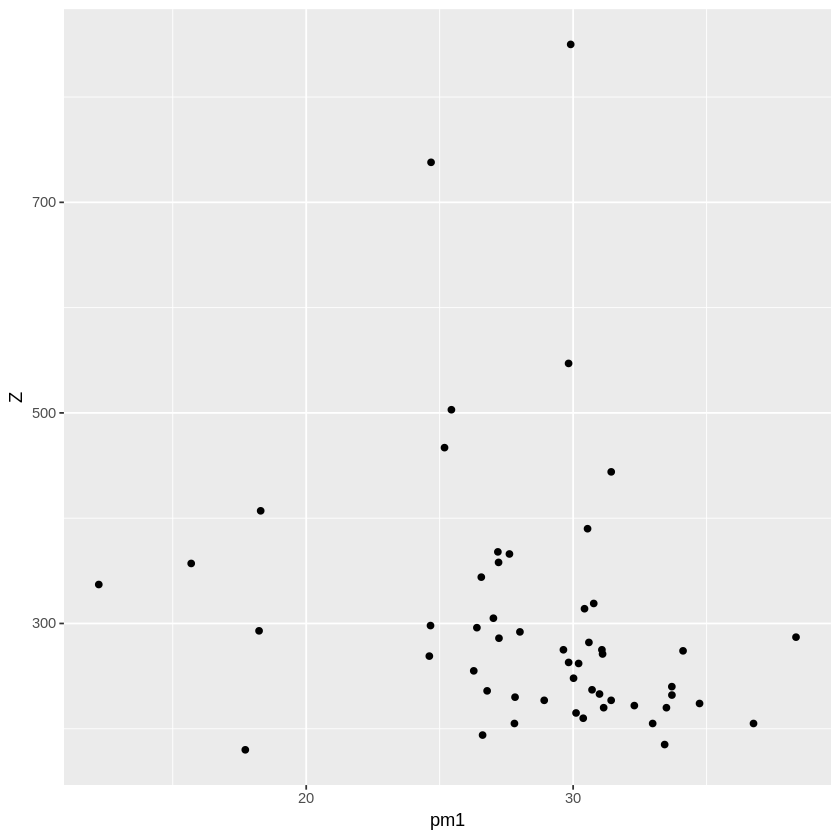

In [115]:
ggplot(z_pm,(aes(y=Z,x=pm1)))+geom_point()